In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



In [2]:
data = pd.read_csv("boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.shape

(506, 14)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,float64


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [9]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
data.nunique()

,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


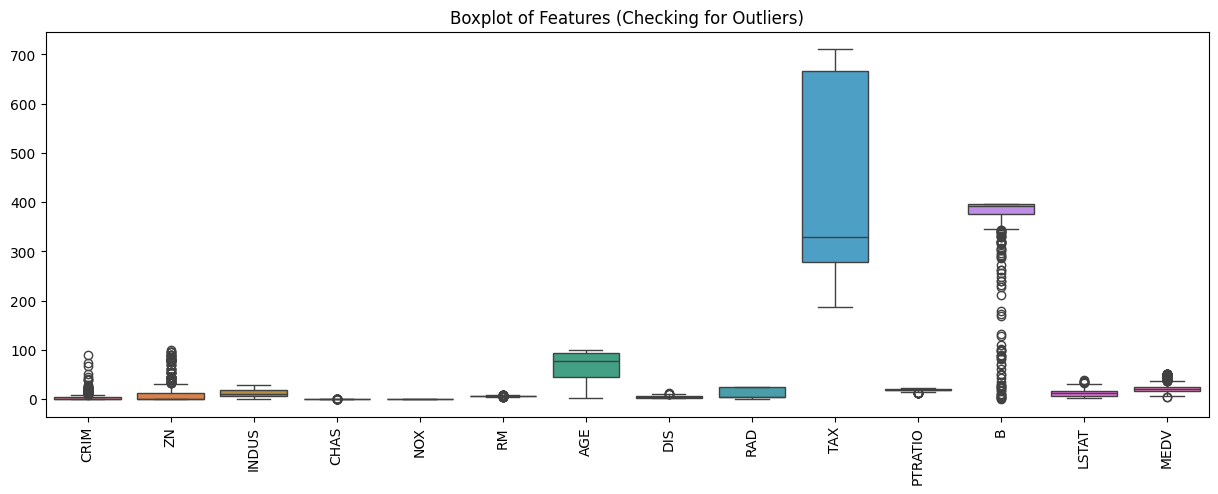

In [11]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Checking for Outliers)")
plt.show()

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (506, 14)
Cleaned dataset shape: (268, 14)


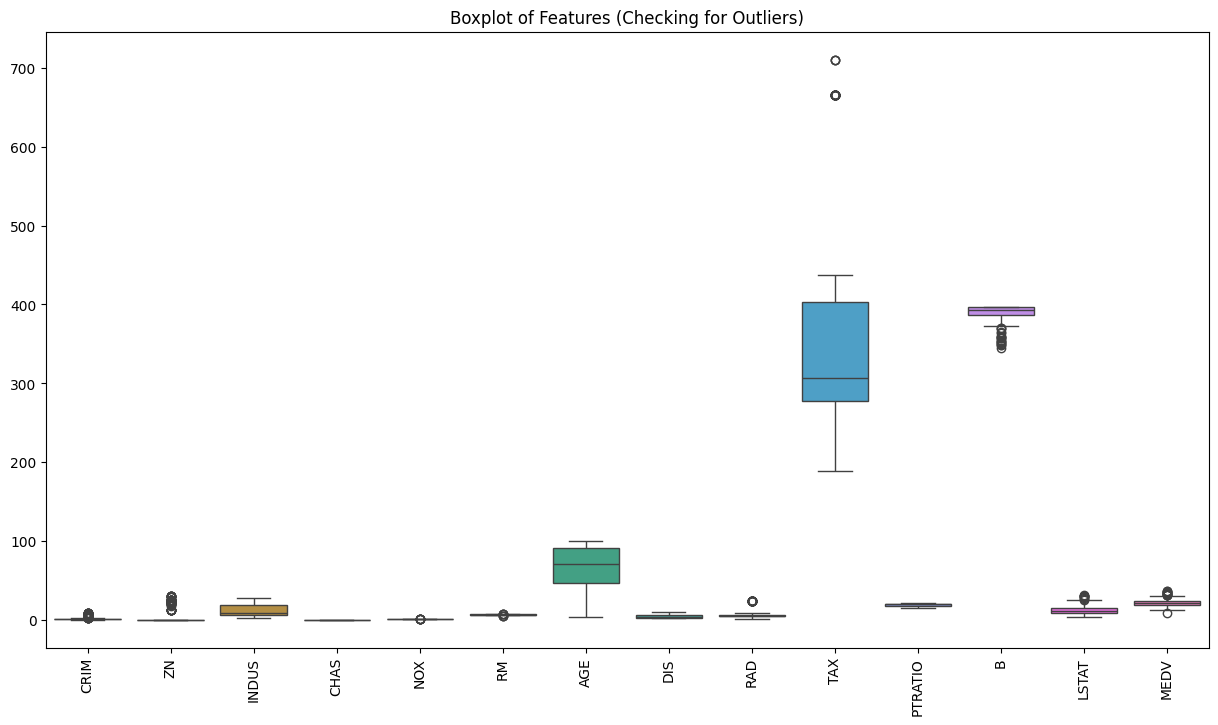

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Checking for Outliers)")
plt.show()

In [14]:
X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train)

[[ 1.28770177 -0.50032012  1.03323679 ...  0.84534281 -0.07433689
   1.75350503]
 [-0.33638447 -0.50032012 -0.41315956 ...  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40325332  1.01327135 -0.71521823 ... -0.63717631  0.06529747
  -0.65159505]
 ...
 [-0.40547014  2.95931752 -1.30336132 ... -0.59225149  0.37901005
  -0.91069248]
 [ 0.85189733 -0.50032012  1.03323679 ...  0.84534281 -2.69458597
   1.52257036]
 [-0.38135592 -0.50032012 -0.35216694 ...  1.15981657 -3.12158061
  -0.25731635]]


In [17]:
print(X_test)

[[-0.39680933 -0.50032012 -1.00711147 ... -0.77195078  0.42887165
  -0.48121032]
 [-0.40079621  1.2294987  -0.66439105 ... -0.32270256  0.44418004
  -1.25709448]
 [-0.39523443 -0.50032012  2.43316256 ...  0.80041799  0.36993437
   0.79033849]
 ...
 [ 1.1779666  -0.50032012  1.03323679 ...  0.84534281 -3.5124912
   1.23390203]
 [-0.40131065 -0.50032012 -0.94321444 ...  0.08162084  0.43422959
   0.05669848]
 [-0.39643252 -0.50032012  0.26792466 ...  0.17147048  0.29470458
  -0.49529171]]


In [18]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

In [19]:
lr_model = LinearRegression()
train_and_evaluate(lr_model, X_train, X_test, y_train, y_test)

MAE: 3.1891
MSE: 24.2911
RMSE: 4.9286
R² Score: 0.6688


In [20]:
ridge_model = Ridge(alpha=1.0)
train_and_evaluate(ridge_model, X_train, X_test, y_train, y_test)

MAE: 3.1857
MSE: 24.3129
RMSE: 4.9308
R² Score: 0.6685


In [21]:
lasso_model = Lasso(alpha=0.1)
train_and_evaluate(lasso_model, X_train, X_test, y_train, y_test)

MAE: 3.2418
MSE: 25.6567
RMSE: 5.0652
R² Score: 0.6501


In [22]:
dt_model = DecisionTreeRegressor()
train_and_evaluate(dt_model, X_train, X_test, y_train, y_test)

MAE: 2.3157
MSE: 10.3404
RMSE: 3.2156
R² Score: 0.8590


In [23]:
rf_model = RandomForestRegressor(n_estimators=100)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)

MAE: 2.1228
MSE: 8.8859
RMSE: 2.9809
R² Score: 0.8788


In [24]:
gbr_model = GradientBoostingRegressor(n_estimators=100)
train_and_evaluate(gbr_model, X_train, X_test, y_train, y_test)

MAE: 1.9204
MSE: 6.2650
RMSE: 2.5030
R² Score: 0.9146


In [25]:
svr_model = SVR()
train_and_evaluate(svr_model, X_train, X_test, y_train, y_test)

MAE: 2.7317
MSE: 25.6685
RMSE: 5.0664
R² Score: 0.6500


<ipython-input-26-3a64bfd3e332>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=model_df, palette="viridis")


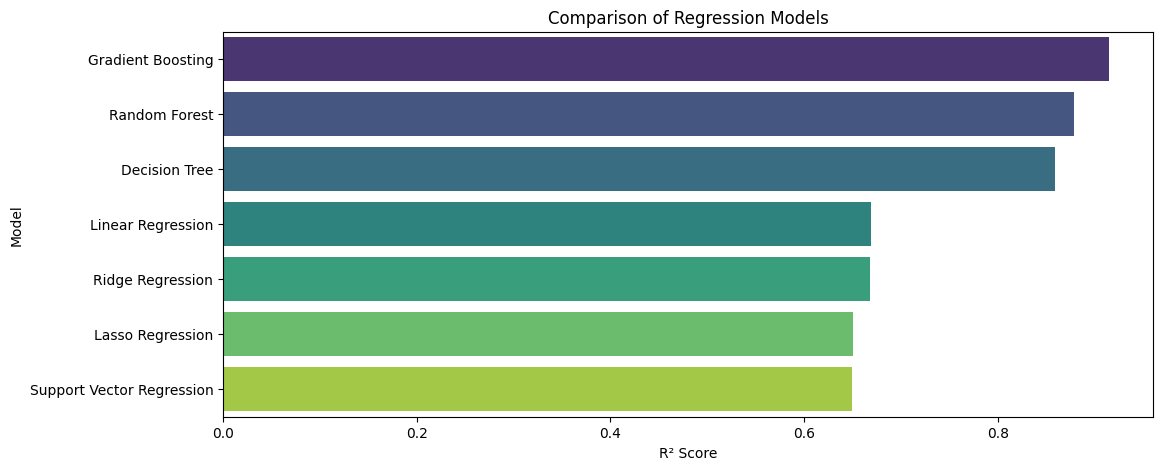

In [26]:
model_results = {
    "Linear Regression": lr_model.score(X_test, y_test),
    "Ridge Regression": ridge_model.score(X_test, y_test),
    "Lasso Regression": lasso_model.score(X_test, y_test),
    "Decision Tree": dt_model.score(X_test, y_test),
    "Random Forest": rf_model.score(X_test, y_test),
    "Gradient Boosting": gbr_model.score(X_test, y_test),
    "Support Vector Regression": svr_model.score(X_test, y_test)
}

model_df = pd.DataFrame(model_results.items(), columns=["Model", "R² Score"])
model_df = model_df.sort_values(by="R² Score", ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x="R² Score", y="Model", data=model_df, palette="viridis")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Comparison of Regression Models")
plt.show()

In [29]:
print("Best Model:")
print(model_df.iloc[0])

Best Model:
Model       Gradient Boosting
R² Score             0.914569
Name: 5, dtype: object
